# California Housing Data Regression  


This data set contains information about all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. 

The task is to aproximate the median house value of each block from the values of the rest of the variables. 

 It has been obtained from the LIACC repository. The original page where the data set can be found is: http://www.liaad.up.pt/~ltorgo/Regression/DataSets.html.
 

The Features:
 
* housingMedianAge: continuous. 
* totalRooms: continuous. 
* totalBedrooms: continuous. 
* population: continuous. 
* households: continuous. 
* medianIncome: continuous. 
* medianHouseValue: continuous. 

## The Data

** Import the cal_housing_clean.csv file with pandas. Separate it into a training (70%) and testing set(30%).**

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [85]:
df = pd.read_csv('cal_housing_clean.csv')

In [86]:
df.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [87]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
housingMedianAge,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
totalRooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
totalBedrooms,20640.0,537.898014,421.247906,1.0000,295.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
medianIncome,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
medianHouseValue,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [88]:
df.corr()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
housingMedianAge,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,-0.119034,0.105623
totalRooms,-0.361262,1.000000,0.929893,0.857126,0.918484,0.198050,0.134153
totalBedrooms,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.008093,0.050594
population,-0.296244,0.857126,0.878026,1.000000,0.907222,0.004834,-0.024650
households,-0.302916,0.918484,0.979829,0.907222,1.000000,0.013033,0.065843
medianIncome,-0.119034,0.198050,-0.008093,0.004834,0.013033,1.000000,0.688075
medianHouseValue,0.105623,0.134153,0.050594,-0.024650,0.065843,0.688075,1.000000


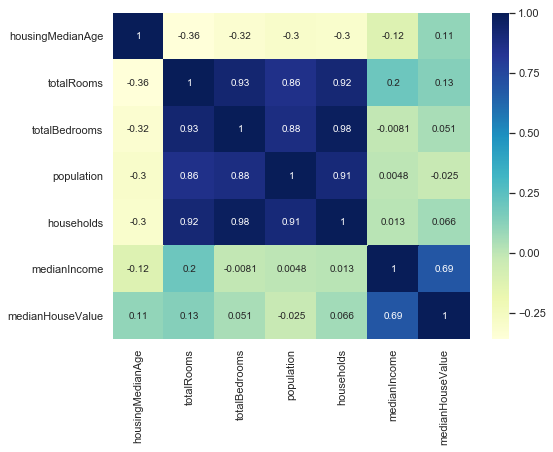

In [89]:
plt.figure(figsize=(8,6))
corr_df = df.corr()
sns.heatmap(corr_df, annot=True, cmap="YlGnBu")

**Visulization and Data Cleaning**

Text(0.5,1,'Population Distribution')

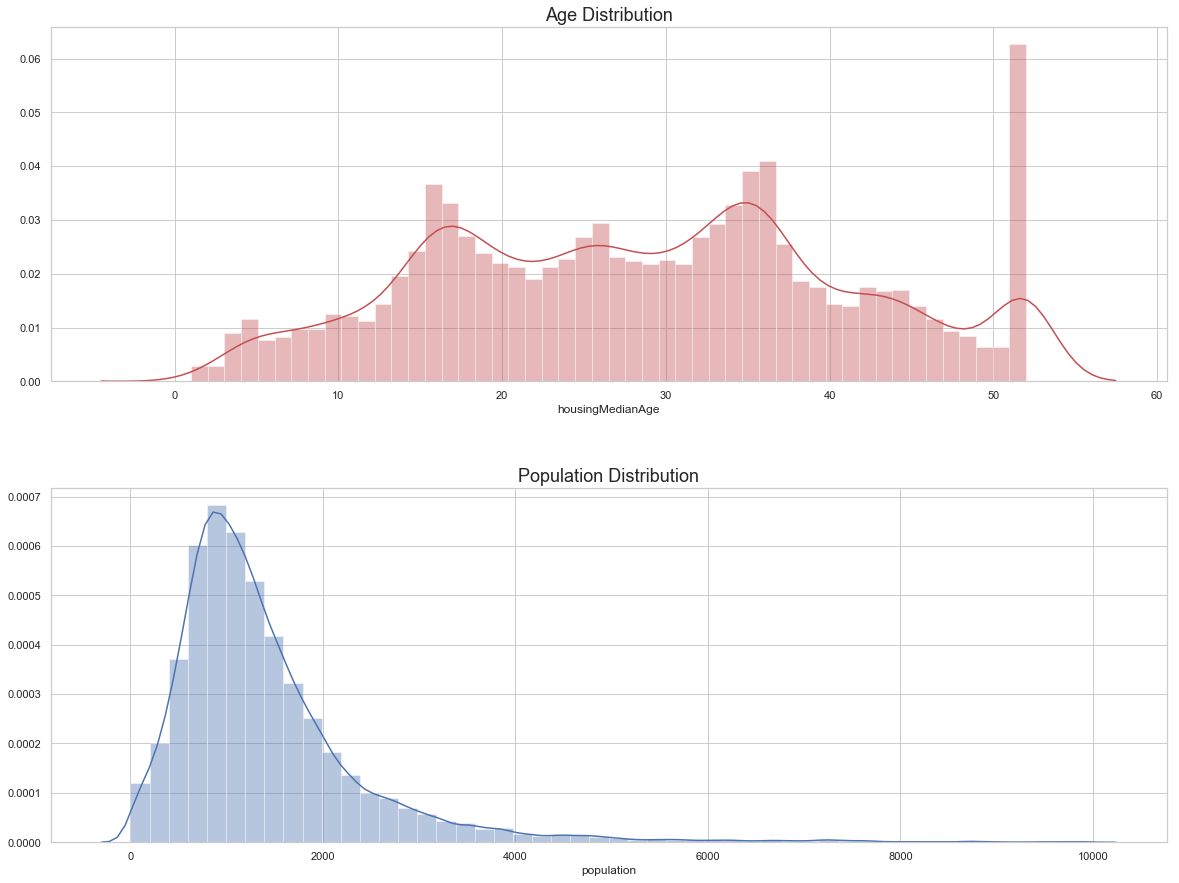

In [90]:
fig = plt.figure(figsize=(20,15))

sns.set_style('whitegrid')
plt.subplot(2, 1, 1)
sns.distplot(df['housingMedianAge'], bins=50, color='r')
plt.title('Age Distribution', fontsize=18)

fig.subplots_adjust(hspace=.3)

plt.subplot(2, 1, 2)
sns.distplot(df[df['population'] < 10000]['population'], bins=50)
plt.title('Population Distribution', fontsize=18)

In [91]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

m = ols('housingMedianAge ~ medianIncome', df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:       housingMedianAge   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     296.6
Date:                Wed, 10 Jul 2019   Prob (F-statistic):           5.19e-66
Time:                        00:21:35   Log-Likelihood:                -81411.
No. Observations:               20640   AIC:                         1.628e+05
Df Residuals:                   20638   BIC:                         1.628e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       31.6917      0.197    160.533   

### Scale the Feature Data

** Use sklearn preprocessing to create a MinMaxScaler for the feature data. Fit this scaler only to the training data. Then use it to transform X_test and X_train. Then use the scaled X_test and X_train along with pd.Dataframe to re-create two dataframes of scaled data.**

In [92]:
X = df.drop(['medianHouseValue'], axis=1)
y = df['medianHouseValue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [94]:
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)

In [95]:
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

### Create Feature Columns

** Create the necessary tf.feature_column objects for the estimator. They should all be trated as continuous numeric_columns. **

In [96]:
df.columns

Index(['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population',
       'households', 'medianIncome', 'medianHouseValue'],
      dtype='object')

In [97]:
import tensorflow as tf

In [98]:
age = tf.feature_column.numeric_column('housingMedianAge')
rooms = tf.feature_column.numeric_column('totalRooms')
bedrooms = tf.feature_column.numeric_column('totalBedrooms')
pop = tf.feature_column.numeric_column('population')
households = tf.feature_column.numeric_column('households')
income = tf.feature_column.numeric_column('medianIncome')

In [99]:
feat_cols = [age,rooms,bedrooms,pop,households,income]

** Create the input function for the estimator object. (play around with batch_size and num_epochs)**

In [100]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

** Create the estimator model. Use a DNNRegressor. Play around with the hidden units! **

In [101]:
model = tf.estimator.DNNRegressor(feature_columns=feat_cols,hidden_units=[10,10,10])
model.train(input_fn=input_func,steps=25000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/8p/t_jl6drn1gx57wvwvfs4x4_w0000gn/T/tmp2f5jn_k7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a2c7329b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 

INFO:tensorflow:loss = 58272890000.0, step = 6801 (0.181 sec)
INFO:tensorflow:global_step/sec: 555.013
INFO:tensorflow:loss = 28771410000.0, step = 6901 (0.179 sec)
INFO:tensorflow:global_step/sec: 562.198
INFO:tensorflow:loss = 68699783000.0, step = 7001 (0.179 sec)
INFO:tensorflow:global_step/sec: 563.539
INFO:tensorflow:loss = 146735840000.0, step = 7101 (0.177 sec)
INFO:tensorflow:global_step/sec: 569.532
INFO:tensorflow:loss = 85018290000.0, step = 7201 (0.175 sec)
INFO:tensorflow:global_step/sec: 562.742
INFO:tensorflow:loss = 63108776000.0, step = 7301 (0.178 sec)
INFO:tensorflow:global_step/sec: 560.259
INFO:tensorflow:loss = 75062440000.0, step = 7401 (0.181 sec)
INFO:tensorflow:global_step/sec: 577.347
INFO:tensorflow:loss = 87317310000.0, step = 7501 (0.173 sec)
INFO:tensorflow:global_step/sec: 563.593
INFO:tensorflow:loss = 55195824000.0, step = 7601 (0.176 sec)
INFO:tensorflow:global_step/sec: 572.774
INFO:tensorflow:loss = 41174210000.0, step = 7701 (0.174 sec)
INFO:tenso

INFO:tensorflow:loss = 80130000000.0, step = 14701 (0.202 sec)
INFO:tensorflow:global_step/sec: 575.391
INFO:tensorflow:loss = 14812975000.0, step = 14801 (0.174 sec)
INFO:tensorflow:global_step/sec: 554.367
INFO:tensorflow:loss = 107588570000.0, step = 14901 (0.180 sec)
INFO:tensorflow:global_step/sec: 530.638
INFO:tensorflow:loss = 93006050000.0, step = 15001 (0.190 sec)
INFO:tensorflow:global_step/sec: 544.464
INFO:tensorflow:loss = 47315706000.0, step = 15101 (0.181 sec)
INFO:tensorflow:global_step/sec: 537.686
INFO:tensorflow:loss = 84637660000.0, step = 15201 (0.186 sec)
INFO:tensorflow:global_step/sec: 569.162
INFO:tensorflow:loss = 78452820000.0, step = 15301 (0.176 sec)
INFO:tensorflow:global_step/sec: 578.653
INFO:tensorflow:loss = 80792550000.0, step = 15401 (0.174 sec)
INFO:tensorflow:global_step/sec: 560.14
INFO:tensorflow:loss = 106756465000.0, step = 15501 (0.177 sec)
INFO:tensorflow:global_step/sec: 563.094
INFO:tensorflow:loss = 107493690000.0, step = 15601 (0.178 sec)

INFO:tensorflow:loss = 77557690000.0, step = 22601 (0.185 sec)
INFO:tensorflow:global_step/sec: 502.228
INFO:tensorflow:loss = 52632460000.0, step = 22701 (0.198 sec)
INFO:tensorflow:global_step/sec: 560.531
INFO:tensorflow:loss = 58766450000.0, step = 22801 (0.177 sec)
INFO:tensorflow:global_step/sec: 552.706
INFO:tensorflow:loss = 58198622000.0, step = 22901 (0.182 sec)
INFO:tensorflow:global_step/sec: 542.842
INFO:tensorflow:loss = 88572860000.0, step = 23001 (0.184 sec)
INFO:tensorflow:global_step/sec: 542.003
INFO:tensorflow:loss = 89507860000.0, step = 23101 (0.185 sec)
INFO:tensorflow:global_step/sec: 471.333
INFO:tensorflow:loss = 44332500000.0, step = 23201 (0.214 sec)
INFO:tensorflow:global_step/sec: 494.272
INFO:tensorflow:loss = 65052156000.0, step = 23301 (0.200 sec)
INFO:tensorflow:global_step/sec: 528.418
INFO:tensorflow:loss = 40863875000.0, step = 23401 (0.189 sec)
INFO:tensorflow:global_step/sec: 494.284
INFO:tensorflow:loss = 16192018000.0, step = 23501 (0.203 sec)
I

** Create a prediction input function**

In [102]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

pred_gen = model.predict(predict_input_func)
predictions = list(pred_gen)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/8p/t_jl6drn1gx57wvwvfs4x4_w0000gn/T/tmp2f5jn_k7/model.ckpt-25000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


** Calculate the RMSE. You should be able to get around 100,000 RMSE (remember that this is in the same units as the label.) Do this manually or use [sklearn.metrics](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) **

In [103]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['predictions'])

In [104]:
from sklearn.metrics import mean_absolute_error

In [105]:
mean_absolute_error(y_test,final_preds)

64437.88759942264